In [1]:
import os
import numpy as np
import random
from past.builtins import xrange
import math
import operator
import matplotlib.pyplot as plt


In [2]:
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just 
        memorizing the training data.
        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y
    
    def predict(self, X, k=1, num_loops=0):
        """
        Predict labels for test data using this classifier.
        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.
        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].  
        """
        if num_loops == 0:
            dists = self.compute_distances_L2(X)

        return self.predict_labels(dists, k=k)

  
    def compute_distances_L1(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.
        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        for i in range(num_test):
            # using the L1 distance (sum of absolute value differences)
            dists[i,:] = np.sum(np.abs(self.X_train - X[i,:]), axis = 1)

        return dists
    
    def compute_distances_L2(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.
        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 


        # L2 distance vectorized.
        X_squared = np.sum(X**2,axis=1)
        Y_squared = np.sum(self.X_train**2,axis=1)
        XY = np.dot(X, self.X_train.T)

        # Expand L2 distance formula to get L2(X,Y) = sqrt((X-Y)^2) = sqrt(X^2 + Y^2 -2XY)
        dists = np.sqrt(X_squared[:,np.newaxis] + Y_squared -2*XY)
        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.
        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.
        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].  
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []

            # Select a test row.
            test_row = dists[i,:]

            # np.argsort returns indices of sorted input.
            sorted_row = np.argsort(test_row)

            # Get the k closest indices.
            closest_y = self.y_train[sorted_row[0:k]]

            # Find the most occuring index in our closest k.
            y_pred[i] = np.argmax(np.bincount(closest_y))

            return y_pred
    """# Let's compare how fast the implementations are
    def time_function(f, *args):
        """
        #Call a function f with args and return the time (in seconds) that it took to execute.
        """
        import time
        tic = time.time()
        f(*args)
        toc = time.time()
        return toc - tic"""

In [3]:
# Import whole N-MNIST Dataset
def load_NMNIST(path):
    xs_train = []
    ys_train = []
    xs_test = []
    ys_test = []

    for class_index in range(0, 10):
        for (root, dirs, dat_files) in os.walk('{0}/n_Train_2/{1}'.format(path, str(class_index))):
            for file in dat_files:
                single_X = np.fromfile('{0}/n_Train_2/{1}/{2}'.format(path, str(class_index), file), dtype=np.int32)
                xs_train.append(single_X)
                ys_train.append(class_index)

        for (root, dirs, dat_files) in os.walk('{0}/n_Test_2/{1}'.format(path, str(class_index))):
            for file in dat_files:
                xs_test.append(np.fromfile('{0}/n_Test_2/{1}/{2}'.format(path, str(class_index), file), dtype=np.int32))
                ys_test.append(class_index)

    Xtr = np.array(xs_train)
    Ytr = np.array(ys_train)
    Xte = np.array(xs_test)
    Yte = np.array(ys_test)
    
    """Turn Xtr -> 68x34 here since """
    
    return Xtr, Ytr, Xte, Yte

In [4]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

#Load data
data_set_path = 'C:/Users/Justin/Documents/LowPowerActionRecognition/CNN/datasets'
data = load_NMNIST(data_set_path)

#initialise data

X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (60000, 2312)
Training labels shape:  (60000,)
Test data shape:  (10000, 2312)
Test labels shape:  (10000,)


In [5]:
#Input data visualisation
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [6]:
print('X_train are:',X_train.shape)

X_train are: (60000, 2312)


In [7]:
"""# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 3
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        #X_train[idx] = X_train[idx].reshape(34,34,2) # Ptr_rows becomes [number of training sets] x 2312
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()"""

"# Visualize some examples from the dataset.\n# We show a few examples of training images from each class.\nclasses = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']\nnum_classes = len(classes)\nsamples_per_class = 3\nfor y, cls in enumerate(classes):\n    idxs = np.flatnonzero(y_train == y)\n    idxs = np.random.choice(idxs, samples_per_class, replace=False)\n    for i, idx in enumerate(idxs):\n        plt_idx = i * num_classes + y + 1\n        plt.subplot(samples_per_class, num_classes, plt_idx)\n        #X_train[idx] = X_train[idx].reshape(34,34,2) # Ptr_rows becomes [number of training sets] x 2312\n        plt.imshow(X_train[idx])\n        plt.axis('off')\n        if i == 0:\n            plt.title(cls)\nplt.show()"

In [7]:
# Subsample the data for more efficient code execution in this exercise
num_training = 6000 #60000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000 #10000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [12]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    #Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

In [9]:
# flatten out all images to be one-dimensional
#X_train = X_train.reshape(X_train.shape[0], 34 * 34 * 2) # Ptr_rows becomes [number of training sets] x 2312
#X_test = X_test.reshape(X_test.shape[0], 34 * 34 * 2) # Pte_rows becomes [number of testing sets] x 2312
print(X_train.shape, X_test.shape)

(6000, 2312) (1000, 2312)


In [10]:
#from kNN_classifier import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [14]:
dists = classifier.compute_distances_L1(X_test)

#Check dists dimension
print(dists.shape)

# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor) for L1 distance.
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('For L1 distance at K=1, Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
L1_time = time_function(classifier.compute_distances_L1, X_test)
print('L1 distance version took %f seconds' % L1_time)

(1000, 6000)
For L1 distance at K=1, Got 980 / 1000 correct => accuracy: 0.980000
L1 distance version took 76.772196 seconds


In [13]:
dists = classifier.compute_distances_L2(X_test)

#Check dists dimension
print(dists.shape)

# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor) for L1 distance.
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('For L2 distance at K=1, Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
L2_time = time_function(classifier.compute_distances_L2, X_test)
print('L2 distance version took %f seconds' % L2_time)

(1000, 6000)
For L2 distance at K=1, Got 980 / 1000 correct => accuracy: 0.980000
L2 distance version took 6.928474 seconds


In [16]:
#k=5 test for L2

#Calling L1 distance
dists = classifier.compute_distances_L2(X_test)

y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('For L2 distance at k=5, Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
L2_time = time_function(classifier.compute_distances_L2, X_test)
print('L2 distance version took %f seconds' % L2_time)

For L2 distance at k=5, Got 980 / 1000 correct => accuracy: 0.980000
L2 distance version took 8.082817 seconds


In [15]:
#k=5 test for L1

#Calling L1 distance
dists = classifier.compute_distances_L1(X_test)

y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('For L1 distance at k=5, Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
L1_time = time_function(classifier.compute_distances_L1, X_test)
print('L1 distance version took %f seconds' % L1_time)

For L1 distance at k=5, Got 980 / 1000 correct => accuracy: 0.980000
L1 distance version took 75.926649 seconds


In [22]:
# Cross validation for L2
num_folds = 20
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

# Split up the training data into folds 
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     

X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))


# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}

# Perform k-fold cross validation to find the best value of k. For each        
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   
# where in each case you use all but one of the folds as training data and the 
# last fold as a validation set. Store the accuracies for all fold and all     
# values of k in the k_to_accuracies dictionary.                               

for k in k_choices:
    for n in xrange(num_folds):
        combinat = [x for x in xrange(num_folds) if x != n] 
        x_training_dat = np.concatenate(X_train_folds[combinat])
        y_training_dat = np.concatenate(y_train_folds[combinat])
        classifier_k = KNearestNeighbor()
        classifier_k.train(x_training_dat, y_training_dat)
        y_cross_validation_pred = classifier_k.predict_labels(X_train_folds[n], k)
        num_correct = np.sum(y_cross_validation_pred == y_train_folds[n])
        accuracy = float(num_correct) / num_test
        k_to_accuracies.setdefault(k, []).append(accuracy)

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        #print('k = %d, accuracy = '%f' % (k, accuracy))
        print('k = %d, accuracy = %f' % (k, accuracy))
    print('mean for k=%d is %f' % (k, np.mean(k_to_accuracies[k])))

k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.300000
k = 1, accuracy = 0.223000
mean for k=1 is 0.296150
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k = 3, accuracy = 0.300000
k =

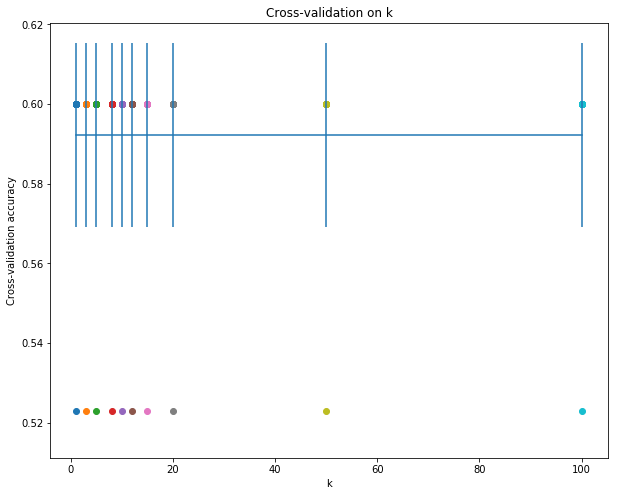

In [21]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [ ]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 1

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))